# Life Cycle Assessment - ICAS 2024

> **⚠ This notebook has been developed with the AeroMAPS version v0.7.0-beta for obtaining the paper results. However, this notebook has been or could be modified in order to be executable with the latest versions of AeroMAPS, which sometimes leads to different results compared to the ones from the paper, due to some models' modifications. In order to retrieve the results of the paper, one can use the v0.7.0-beta version associated with the original notebook.**


The LCA module performs an environmental assessment of the scenarios using data from both AeroMAPS (e.g., fuel combustion emission factors) and the ecoinvent database (for background processes such as electricity generation). In this case study, the environmental profiles of the various fuel production pathways (biofuels and electrofuels) are entirely based on *ecoinvent* data (completed by *premise*) rather than AeroMAPS models. In particular, the some environmental characteristics of the fuel pathways provided in the `energy_inputs.yaml` files are overrode by ecoinvent data in the LCA module (for example the mean CO2 emission factor). While this approach ensures broader coverage of environmental processes, it may also lead to results that are not fully consistent with those generated by AeroMAPS’ core impact models.

## Load modules

First, the user has to load the framework and generate a process.

In [1]:
# --- Import libraries ---
%matplotlib widget
import pandas as pd
import xarray as xr
from aeromaps import create_process
import lca_algebraic as agb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import time
import sys
sys.path.insert(0, './utils/')
from plots import plot_stacked_evolution_subplots, plot_stacked_sensitivity_subplots, plot_evolution_subplots_iams
plt.style.use("bmh")

## Scenario 1

In [2]:
# --- Set AeroMAPS models and create process ---
# Note: first call to LCA module takes a dozen minutes depending on CPU, as it will install ecoinvent/premise databases (unless previsouly installed)
# and parametrize the LCA model declared in LCA configuration file (each time the kernel is restarted).
process = create_process(
    configuration_file="data/config_scenario_1_remind_ssp2_base.yaml",
)

Initial setup of EcoInvent already done, skipping. To reset the project use option `reset_project=True` in configuration file.
Building LCA model from configuration file
LCA model successfully created
Parametrizing LCIA impacts... Done.


In [3]:
#import lca_algebraic as agb

#agb.findActivity(name='carbon dioxide, captured from atmosphere*', db_name='ecoinvent_cutoff_3.9_remind_SSP2-NPi_2020')


In [4]:
# --- Run assessment ---
start_time = time.time()
process.compute()
process.write_json()
print("--- %s seconds ---" % (time.time() - start_time))

Running MDA
--- 3.826225996017456 seconds ---


In [5]:
# --- Results arrays ---
process_data_vector_outputs_scenario_1 = process.data["vector_outputs"]
process_data_fleet_model_df_scenario_1 = process.fleet_model.df
process_data_float_inputs_scenario_1 = process.data["float_inputs"]
lca_outputs_scenario_1 = process.data["lca_outputs"]
lca_outputs_scenario_1

<xarray.DataArray 'lca' (systems: 1, impacts: 21, axis: 10, year: 51)> Size: 86kB
array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [1.25854441e+09, 1.23070039e+09, 1.24183830e+09, ...,
          2.54116231e+09, 2.56749651e+09, 2.59727575e+09],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [6.19057037e+11, 6.05361029e+11, 6.10839580e+11, ...,
          1.24995542e+12, 1.26290878e+12, 1.27755669e+12],
...
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]]])
Coordinates:
  * systems  (systems) object 8B ('Foreground DB', 'model')
  * impacts  (impacts) object 168B ('ReCiPe 2016 v1.03, midpoint (H)', 'acidi...
  * axis     (axis) object 80B 'combustion_biofuel' ... 'production_electrofu...
  * year     (year) float64 408B 2e+03 2.001e+03 ... 2.049e+03 2.05e+03

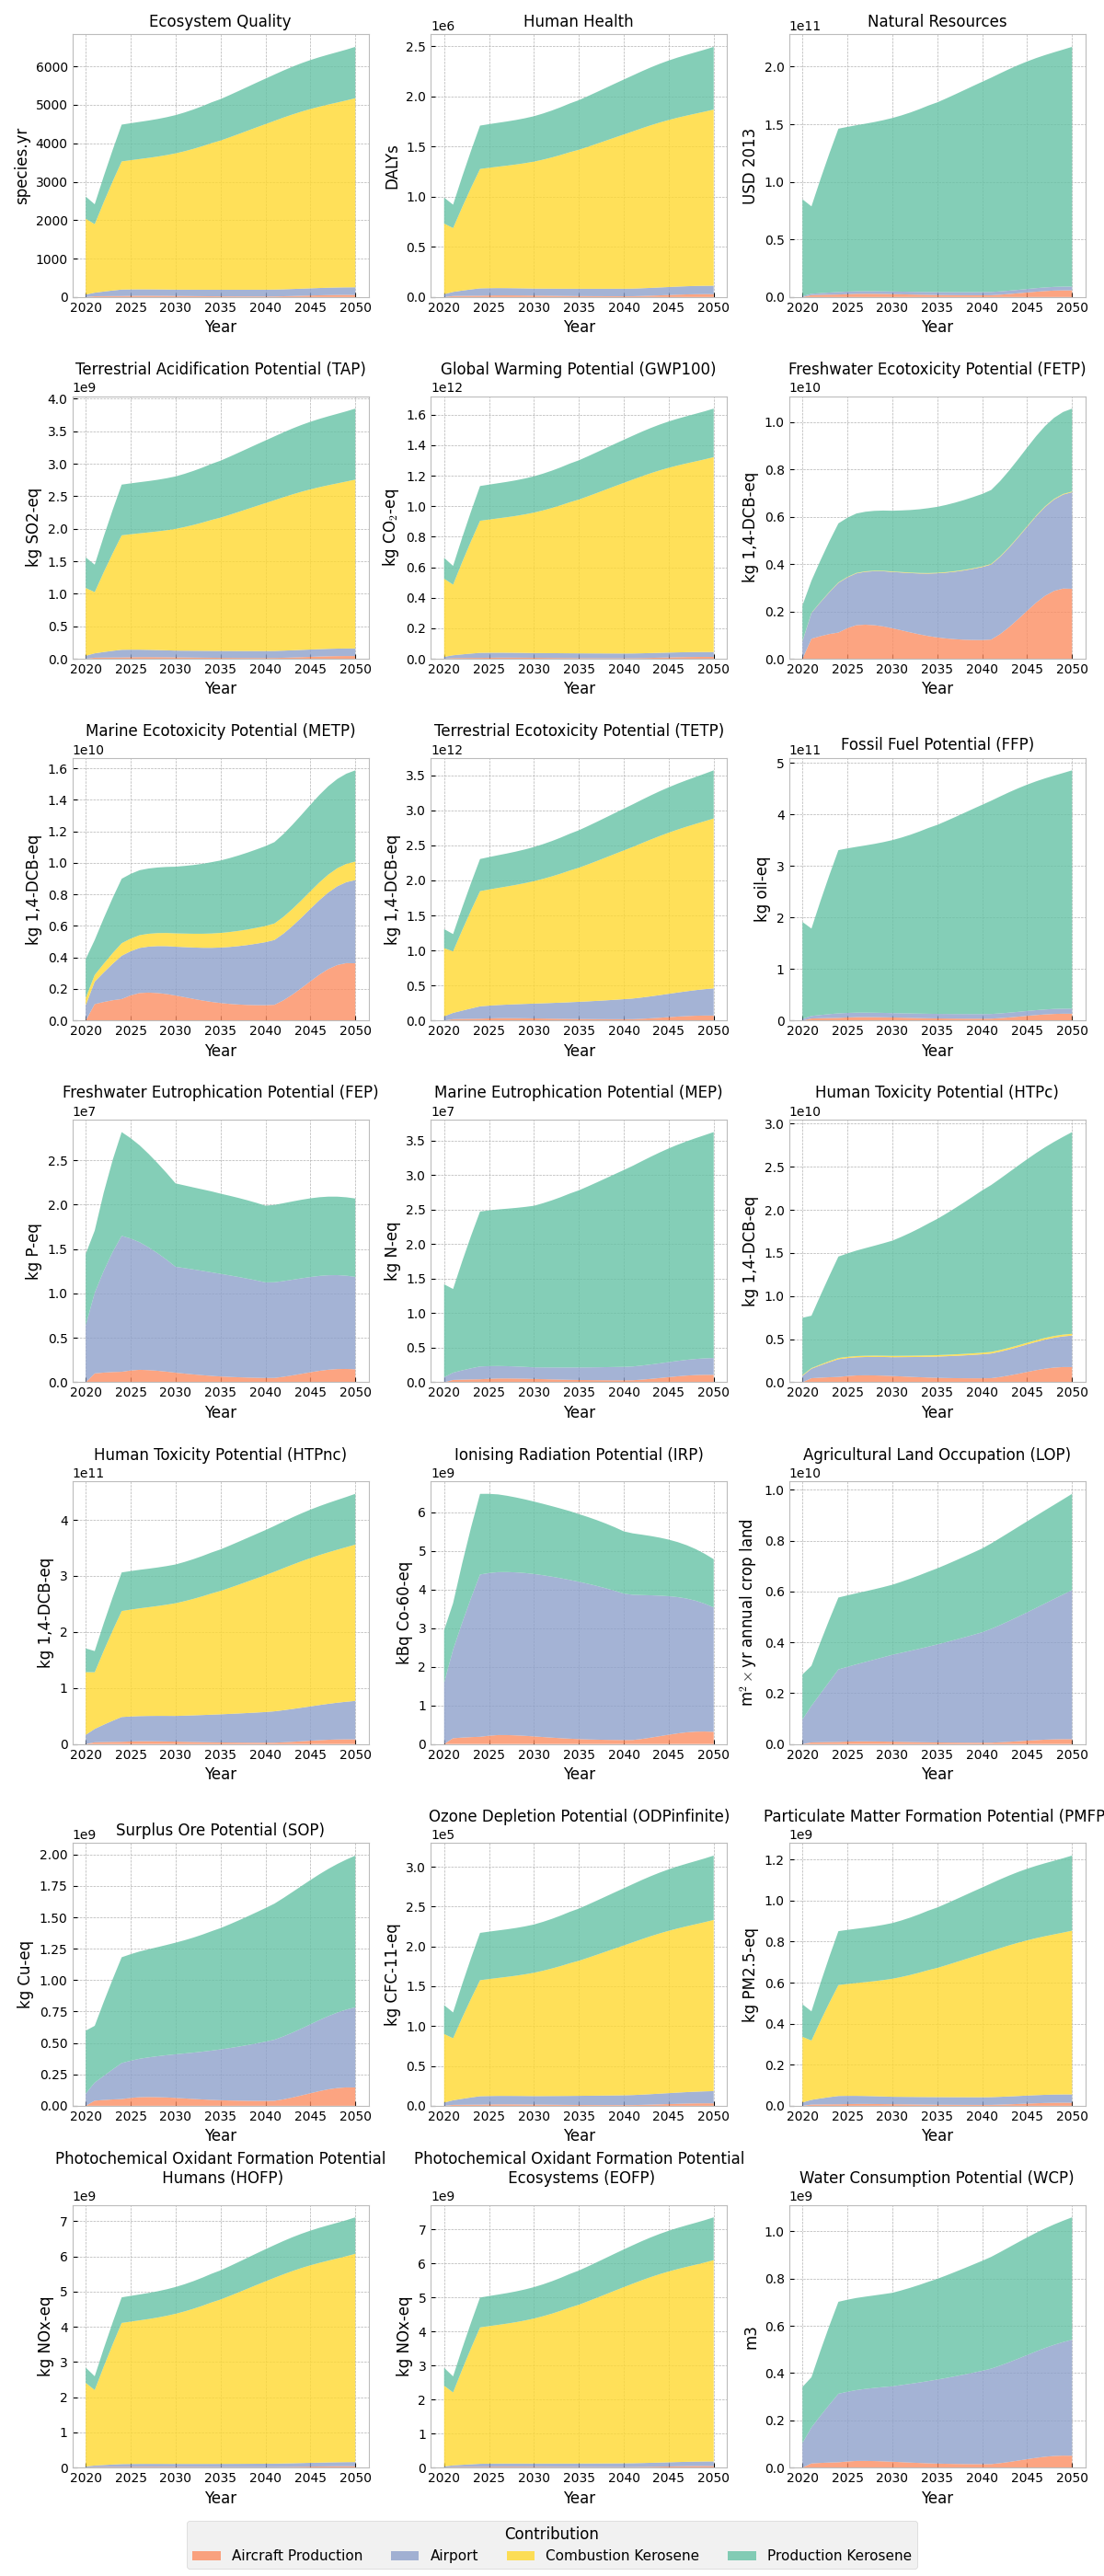

In [6]:
# --- Plots ---
plt.close()
plot_stacked_evolution_subplots(lca_outputs_scenario_1.sel(year=slice(2020, 2050)))

## Scenario 2

In [7]:
process = create_process(
    configuration_file="data/config_scenario_2_remind_ssp2_base.yaml"
)

Loaded LCA model from temporary file (precompiled from previous run in current session).


In [8]:
start_time = time.time()
process.compute()
process.write_json()
print("--- %s seconds ---" % (time.time() - start_time))

Running MDA
--- 3.843991279602051 seconds ---


In [9]:
process_data_vector_outputs_scenario_2 = process.data["vector_outputs"]
process_data_fleet_model_df_scenario_2 = process.fleet_model.df
process_data_float_inputs_scenario_2 = process.data["float_inputs"]
lca_outputs_scenario_2 = process.data["lca_outputs"]
lca_outputs_scenario_2

<xarray.DataArray 'lca' (systems: 1, impacts: 21, axis: 10, year: 51)> Size: 86kB
array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          6.44834445e+08, 6.91059044e+08, 7.45017917e+08],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          5.18324343e+08, 6.22678689e+08, 7.45017917e+08],
         [1.25854441e+09, 1.23070039e+09, 1.24183830e+09, ...,
          1.12191397e+09, 9.64516666e+08, 7.79182726e+08],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          4.42469064e+06, 5.22615836e+06, 6.14604249e+06],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.26811391e+08, 1.49692012e+08, 1.75931313e+08],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          9.07400002e+08, 1.07265500e+09, 1.26254525e+09]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.79869335e+09, 1.92763168e+09, 2.07814391e+09],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.44580761e+09, 1.73689235e+09, 2.07814391e+09],
         [6.19057037e+11, 6.05361029e+11, 6.10839580e+11, ...,
          5.51850798e+11, 4.74429687e+11, 3.83267008e+11],
...
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.62480832e+04, 1.94764758e+04, 2.32518138e+04],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          8.97566428e+04, 1.05719249e+05, 1.23967868e+05],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          6.12010487e+05, 7.25024579e+05, 8.55265421e+05]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.24419100e+08, 1.48532255e+08, 1.76594656e+08],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.14541214e+09, 1.31219079e+09, 1.49363242e+09],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.11835752e+10, 1.28940964e+10, 1.47800558e+10]]]])
Coordinates:
  * systems  (systems) object 8B ('Foreground DB', 'model')
  * impacts  (impacts) object 168B ('ReCiPe 2016 v1.03, midpoint (H)', 'acidi...
  * axis     (axis) object 80B 'combustion_biofuel' ... 'production_electrofu...
  * year     (year) float64 408B 2e+03 2.001e+03 ... 2.049e+03 2.05e+03

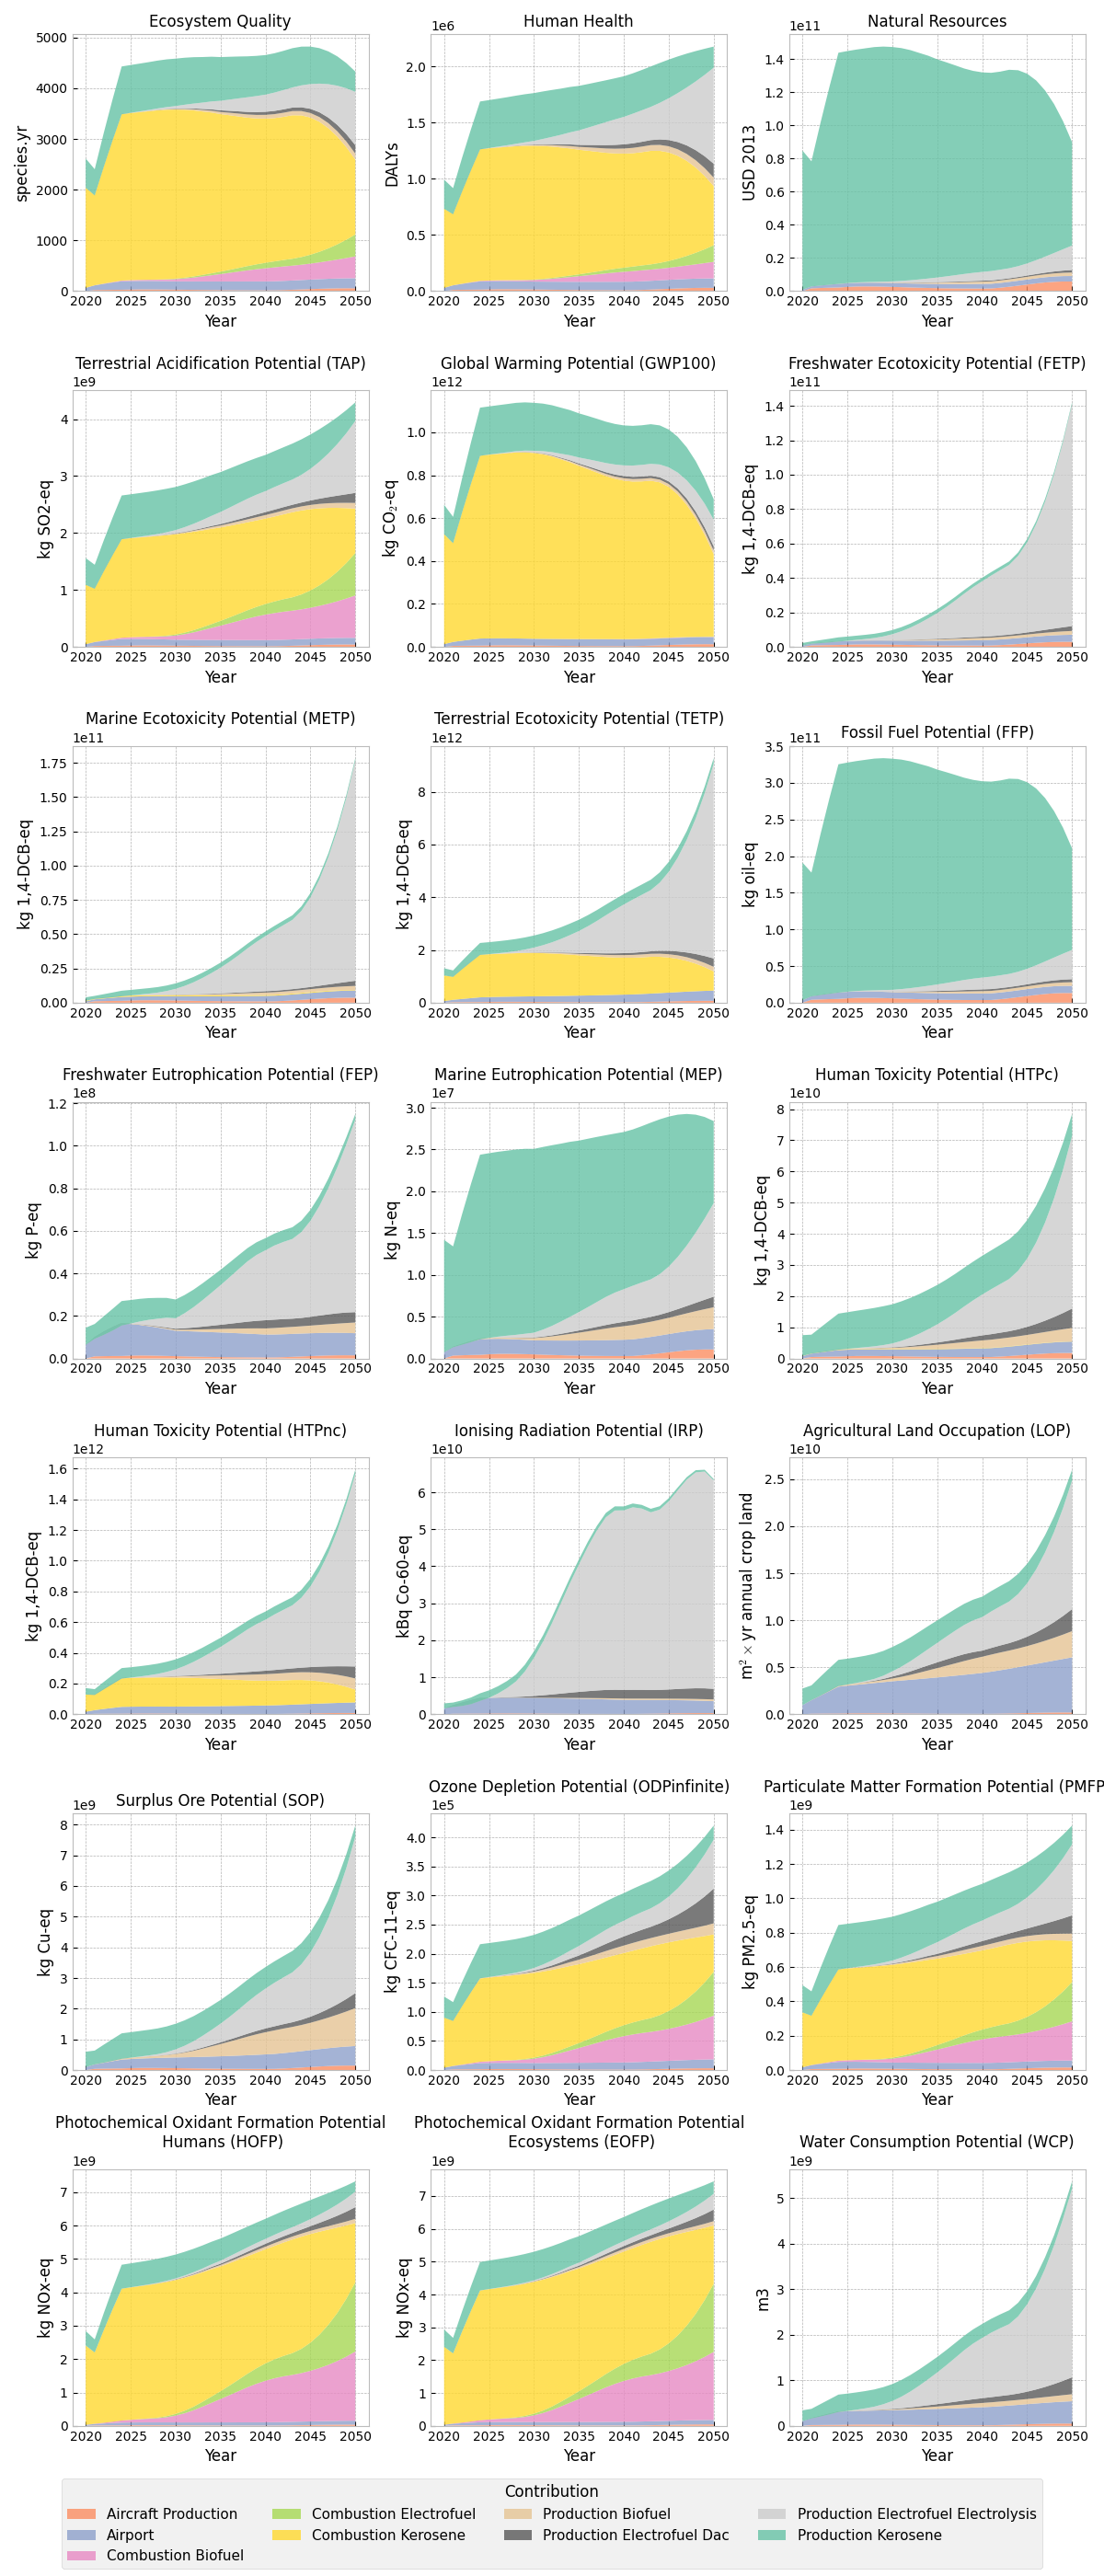

In [10]:
plt.close()
plot_stacked_evolution_subplots(lca_outputs_scenario_2.sel(year=slice(2020, 2050)))

## Scenario 3

In [11]:
process = create_process(
    configuration_file="data/config_scenario_3_remind_ssp2_base.yaml",
)

Loaded LCA model from temporary file (precompiled from previous run in current session).


In [12]:
start_time = time.time()
process.compute()
process.write_json()
print("--- %s seconds ---" % (time.time() - start_time))

Running MDA
--- 3.900604724884033 seconds ---


In [13]:
process_data_vector_outputs_scenario_3 = process.data["vector_outputs"]
process_data_fleet_model_df_scenario_3 = process.fleet_model.df
process_data_float_inputs_scenario_3 = process.data["float_inputs"]
lca_outputs_scenario_3 = process.data["lca_outputs"]
lca_outputs_scenario_3

<xarray.DataArray 'lca' (systems: 1, impacts: 21, axis: 10, year: 51)> Size: 86kB
array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          6.44834445e+08, 6.91059044e+08, 7.45017917e+08],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          5.18324343e+08, 6.22678689e+08, 7.45017917e+08],
         [1.25854441e+09, 1.23070039e+09, 1.24183830e+09, ...,
          1.12191397e+09, 9.64516666e+08, 7.79182726e+08],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          4.09822760e+06, 4.84267922e+06, 5.69764244e+06],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.52119510e+08, 1.80450423e+08, 2.13157654e+08],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.18637382e+09, 1.41812081e+09, 1.68824052e+09]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.79869335e+09, 1.92763168e+09, 2.07814391e+09],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.44580761e+09, 1.73689235e+09, 2.07814391e+09],
         [6.19057037e+11, 6.05361029e+11, 6.10839580e+11, ...,
          5.51850798e+11, 4.74429687e+11, 3.83267008e+11],
...
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.60133708e+04, 1.91991075e+04, 2.29254526e+04],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.33950018e+05, 1.59105788e+05, 1.88197192e+05],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          5.47688991e+05, 6.51871399e+05, 7.72666938e+05]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.19475559e+08, 1.42904781e+08, 1.70234061e+08],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.95082533e+09, 2.29555192e+09, 2.68909398e+09],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          5.13757478e+09, 6.05289255e+09, 7.09970179e+09]]]])
Coordinates:
  * systems  (systems) object 8B ('Foreground DB', 'model')
  * impacts  (impacts) object 168B ('ReCiPe 2016 v1.03, midpoint (H)', 'acidi...
  * axis     (axis) object 80B 'combustion_biofuel' ... 'production_electrofu...
  * year     (year) float64 408B 2e+03 2.001e+03 ... 2.049e+03 2.05e+03

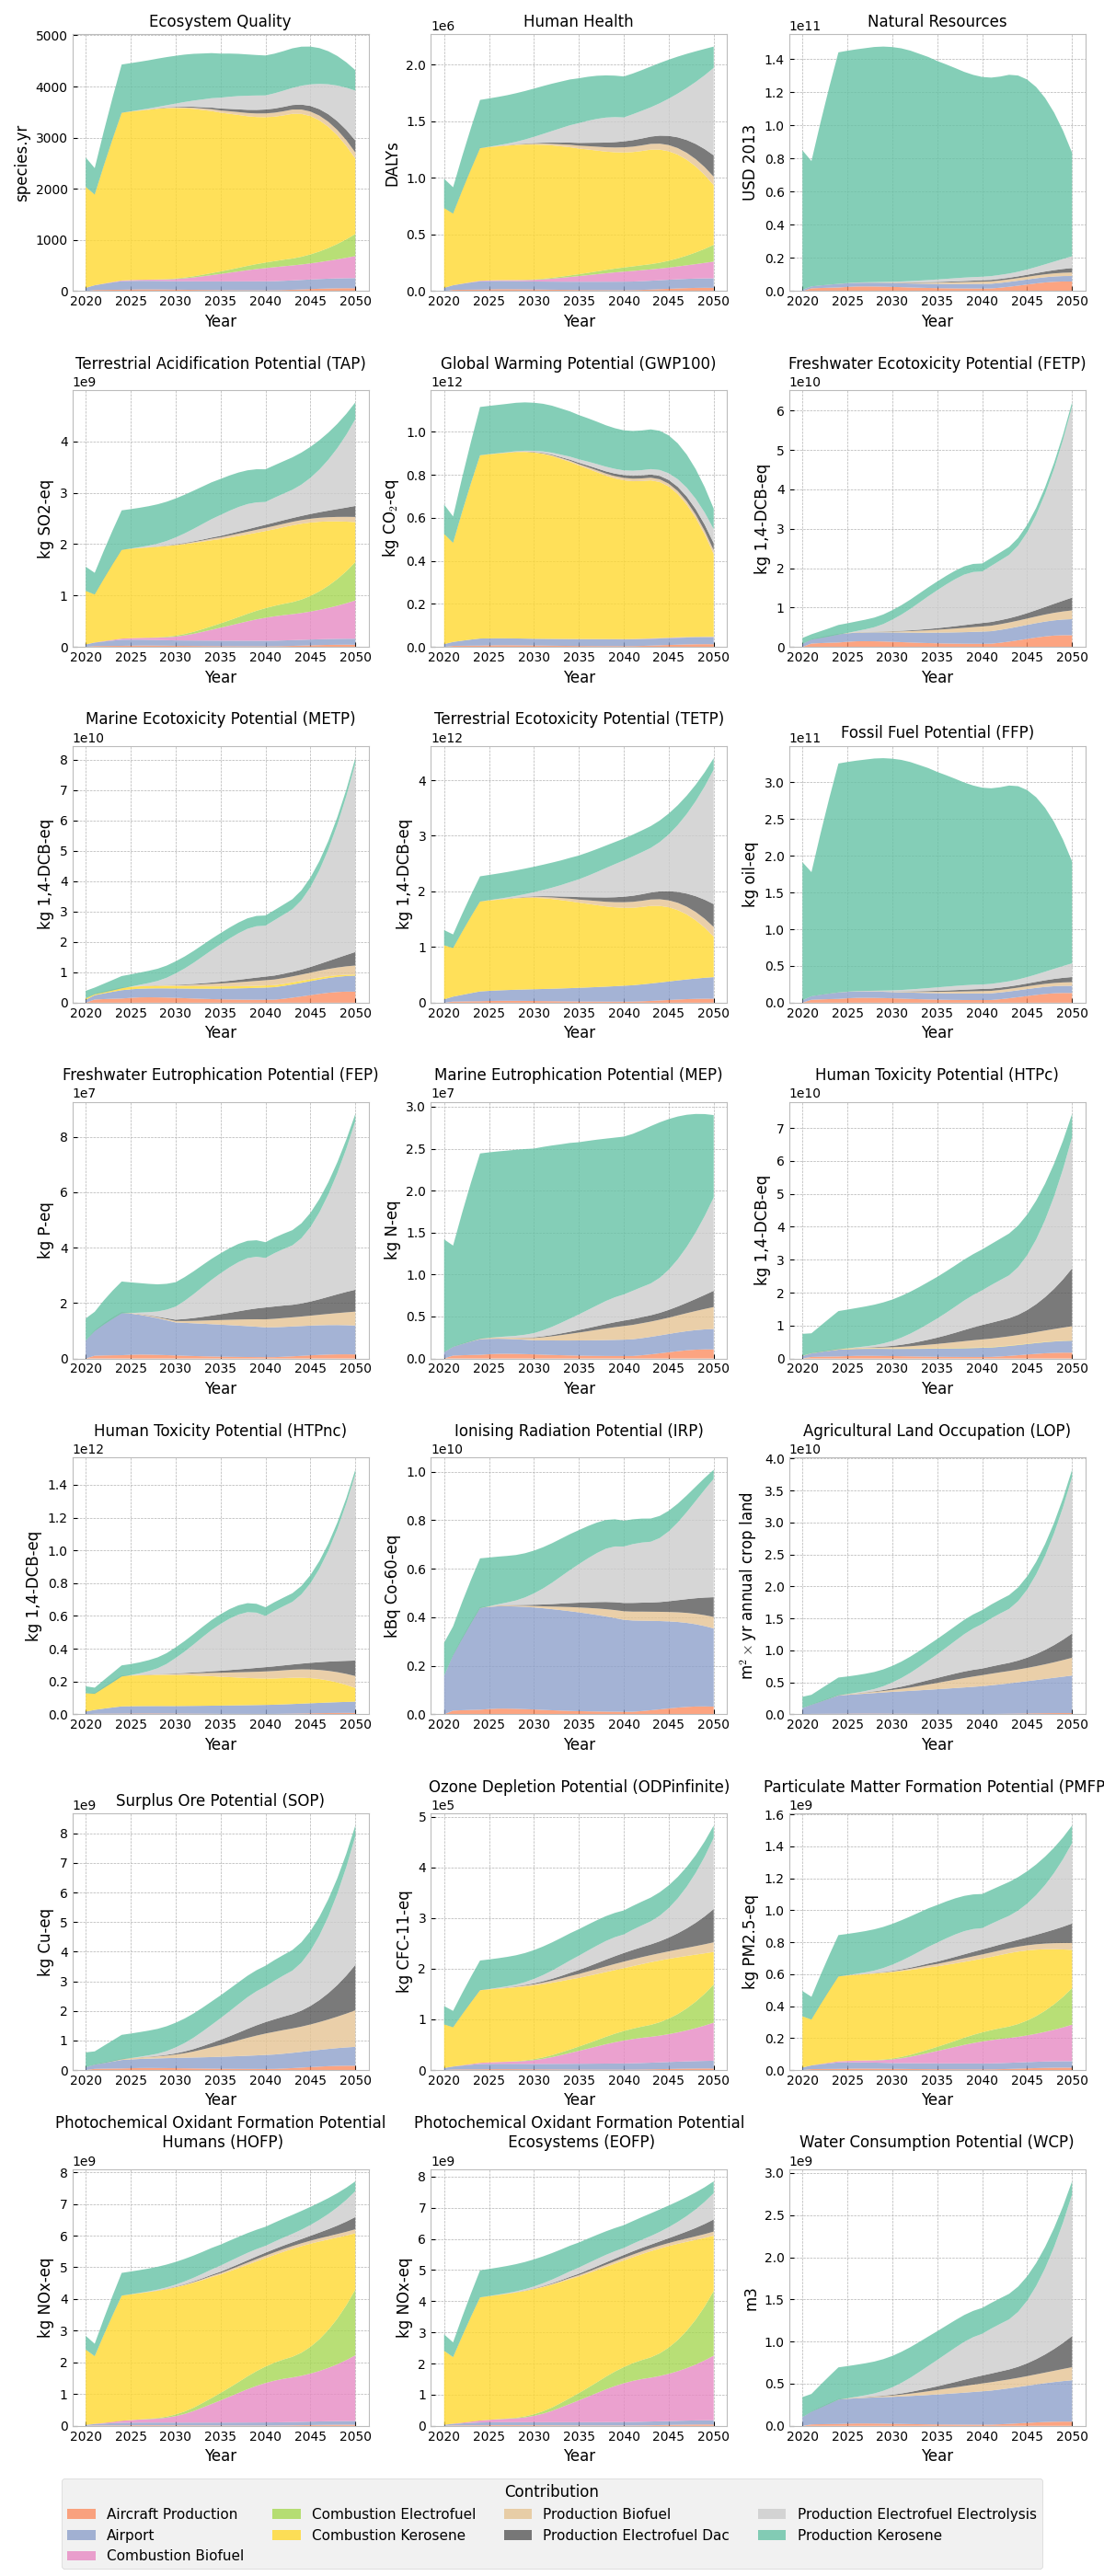

In [14]:
plt.close()
plot_stacked_evolution_subplots(lca_outputs_scenario_3.sel(year=slice(2020, 2050)))

# Post-processing - Sensitivity Analysis

Sensitivity of impacts to share of solar electricity (for the year 2050).

In [15]:
year = 2050
elec_solar_share = np.linspace(start=0, stop=1.0, num=31)

params_dict = dict(
    model="remind",
    pathway="SSP2_NPi",
    rpk_long_range=process_data_vector_outputs_scenario_2["rpk_long_range"][year],
    rpk_medium_range=process_data_vector_outputs_scenario_2["rpk_medium_range"][year],
    rpk_short_range=process_data_vector_outputs_scenario_2["rpk_short_range"][year],
    aircraft_production_long_range=process_data_fleet_model_df_scenario_2[
        "Long Range: Aircraft Production"
    ][year],
    aircraft_production_medium_range=process_data_fleet_model_df_scenario_2[
        "Medium Range: Aircraft Production"
    ][year],
    aircraft_production_short_range=process_data_fleet_model_df_scenario_2[
        "Short Range: Aircraft Production"
    ][year],
    fossil_kerosene_mass_consumption=process_data_vector_outputs_scenario_2[
        "fossil_kerosene_mass_consumption"
    ][year],
    generic_biofuel_mass_consumption=process_data_vector_outputs_scenario_2[
        "generic_biofuel_mass_consumption"
    ][year],
    electrofuel_mass_consumption=process_data_vector_outputs_scenario_2[
        "electrofuel_mass_consumption"
    ][year],
    fossil_kerosene_lhv=process_data_float_inputs_scenario_2["fossil_kerosene_lhv"],
    generic_biofuel_lhv=process_data_float_inputs_scenario_2["generic_biofuel_lhv"],
    electrofuel_lhv=process_data_float_inputs_scenario_2["electrofuel_lhv"],
    fossil_kerosene_emission_index_nox=process_data_float_inputs_scenario_2[
        "fossil_kerosene_emission_index_nox"
    ],
    fossil_kerosene_emission_index_sulfur=process_data_float_inputs_scenario_2[
        "fossil_kerosene_emission_index_sulfur"
    ],
    fossil_kerosene_emission_index_soot=process_data_float_inputs_scenario_2[
        "fossil_kerosene_emission_index_soot"
    ],
    generic_biofuel_emission_index_nox=process_data_float_inputs_scenario_2[
        "generic_biofuel_emission_index_nox"
    ],
    generic_biofuel_emission_index_sulfur=process_data_float_inputs_scenario_2[
        "generic_biofuel_emission_index_sulfur"
    ],
    generic_biofuel_emission_index_soot=process_data_float_inputs_scenario_2[
        "generic_biofuel_emission_index_soot"
    ],
    electrofuel_emission_index_nox=process_data_float_inputs_scenario_2[
        "electrofuel_emission_index_nox"
    ],
    electrofuel_emission_index_sulfur=process_data_float_inputs_scenario_2[
        "electrofuel_emission_index_sulfur"
    ],
    electrofuel_emission_index_soot=process_data_float_inputs_scenario_2[
        "electrofuel_emission_index_soot"
    ],
    load_factor_photovoltaic=0.14,
    elec_solar_share=elec_solar_share,
    year=year,
)

In [16]:
# LCIA calculation
multi_df_lca = (
    pd.DataFrame()
)  # Create empty DataFrame to store the results for each impact method and year

# Calculate impacts for each year
# TODO: this has to be updated with the new xarray implementation of LCA in AeroMAPS for faster processing.
parameters_tmp = params_dict.copy()
for i, elec_solar_share_value in enumerate(params_dict["elec_solar_share"]):
    # Get the value of each parameter for the current year
    for key, val in params_dict.items():
        if isinstance(val, (list, np.ndarray)):
            parameters_tmp[key] = val[i]

    res = process.models["life_cycle_assessment"]._compute_impacts_from_lambdas(**parameters_tmp)

    # Build MultiIndex DataFrame by iterating over each method
    df_year = pd.DataFrame()  # DataFrame for the results of each impact method for the current year
    for method in res.columns:
        # Extract the results for the current method
        data = res[method]
        # Create a DataFrame with MultiIndex consisting of method and year
        df_year_method = pd.DataFrame(
            data.values,
            columns=[elec_solar_share_value],
            index=pd.MultiIndex.from_product([[method], data.index], names=["method", "phase"]),
        )
        # Concatenate the new DataFrame with the existing DataFrame
        df_year = pd.concat([df_year, df_year_method], axis=0)

    # Concatenate the DataFrame with the final LCA DataFrame
    multi_df_lca = pd.concat([multi_df_lca, df_year], axis=1)

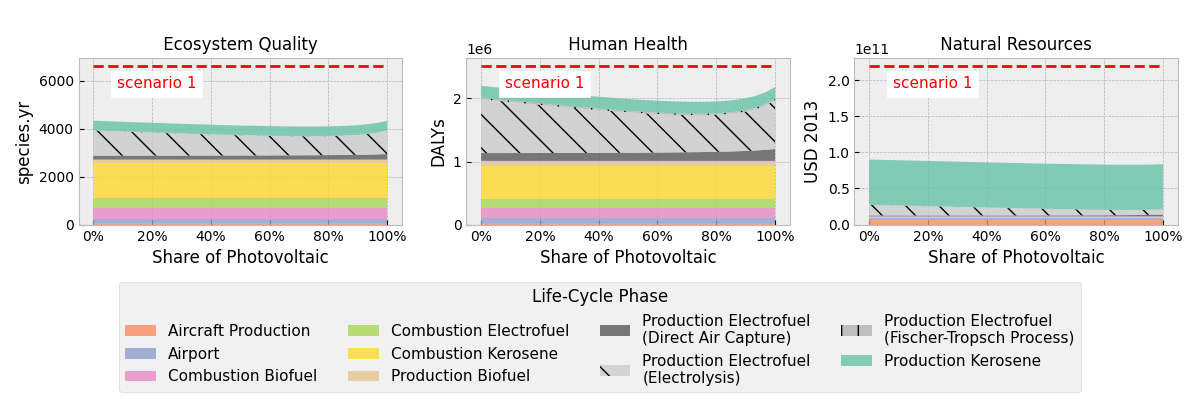

In [17]:
# Plot results
df_to_plot = multi_df_lca[multi_df_lca.index.get_level_values("method").str.contains("total")]
# df_to_plot = multi_df_lca[multi_df_lca.index.get_level_values('method').str.contains('|'.join(['climate', 'land use', 'material']))]

# Reference values from kerosene scenario (scenario 1)
kerosene_scenario_values = {
    "acidification: terrestrial - terrestrial acidification potential (TAP)[kg SO2-Eq]": 3.9042e09,
    "climate change - global warming potential (GWP100)[kg CO2-Eq]": 1.66647e12,
    "ecotoxicity: freshwater - freshwater ecotoxicity potential (FETP)[kg 1,4-DCB-Eq]": 1.1378e10,
    "ecotoxicity: marine - marine ecotoxicity potential (METP)[kg 1,4-DCB-Eq]": 1.72581e10,
    "ecotoxicity: terrestrial - terrestrial ecotoxicity potential (TETP)[kg 1,4-DCB-Eq]": 4.24346e12,
    "energy resources: non-renewable, fossil - fossil fuel potential (FFP)[kg oil-Eq]": 4.92981e11,
    "eutrophication: freshwater - freshwater eutrophication potential (FEP)[kg P-Eq]": 3.07215e07,
    "eutrophication: marine - marine eutrophication potential (MEP)[kg N-Eq]": 3.33666e07,
    "human toxicity: carcinogenic - human toxicity potential (HTPc)[kg 1,4-DCB-Eq]": 2.13437e10,
    "human toxicity: non-carcinogenic - human toxicity potential (HTPnc)[kg 1,4-DCB-Eq]": 4.68682e11,
    "ionising radiation - ionising radiation potential (IRP)[kBq Co-60-Eq]": 5.8845e09,
    "land use - agricultural land occupation (LOP)[m2*a crop-Eq]": 1.03583e10,
    "material resources: metals/minerals - surplus ore potential (SOP)[kg Cu-Eq]": 7.61435e09,
    "ozone depletion - ozone depletion potential (ODPinfinite)[kg CFC-11-Eq]": 302500,
    "particulate matter formation - particulate matter formation potential (PMFP)[kg PM2.5-Eq]": 1.24096e09,
    "photochemical oxidant formation: human health - photochemical oxidant formation potential: humans (HOFP)[kg NOx-Eq]": 7.1164e09,
    "photochemical oxidant formation: terrestrial ecosystems - photochemical oxidant formation potential: ecosystems (EOFP)[kg NOx-Eq]": 7.36927e09,
    "water use - water consumption potential (WCP)[m3]": 1.01181e09,
    "total: ecosystem quality - ecosystem quality[species.yr]": 6615.89,
    "total: human health - human health[DALYs]": 2.51311e06,
    "total: natural resources - natural resources[USD 2013]": 2.1932e11,
}

plt.close()
plot_stacked_sensitivity_subplots(df_to_plot, kerosene_scenario_values)

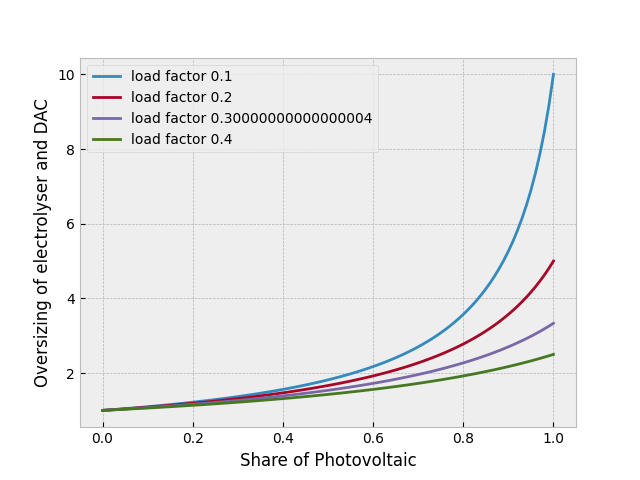

In [18]:
# Visualize evolution of oversizing factor on electrofuel facilities to better understand why we have an optimum on some categories
fig, ax = plt.subplots()
load_factor_test = np.arange(0.1, 0.5, 0.1)
x_test = np.arange(0.0, 1.01, 0.01)
for factor in load_factor_test:
    y_test = 1 / (1.0 - (1.0 - factor) * x_test)
    ax.plot(x_test, y_test, label=f"load factor {factor}")
ax.set_xlabel("Share of Photovoltaic")
ax.set_ylabel("Oversizing of electrolyser and DAC")
ax.legend()

# Postprocessing - From midpoints to endpoints

In [19]:
methods = [
    m for m in agb.findMethods("", mainCat="ReCiPe 2016 v1.03, endpoint (H)") if "total" not in m[1]
]
methods_ecosystem = [m for m in methods if "ecosystem quality" in m[1]]
methods_human_health = [m for m in methods if "human health" in m[1]]
methods_resources = [m for m in methods if "natural resources" in m[1]]

In [20]:
# Create function to get the data for each scenario
def get_scenario_data(scenario, year, elec_solar_share):
    scenario_data_vector = globals()[f"process_data_vector_outputs_scenario_{scenario}"]
    scenario_data_fleet = globals()[f"process_data_fleet_model_df_scenario_{scenario}"]
    scenario_data_float = globals()[f"process_data_float_inputs_scenario_{scenario}"]

    return dict(
        model="remind",
        pathway="SSP2_NPi",
        rpk_long_range=scenario_data_vector["rpk_long_range"][year],
        rpk_medium_range=scenario_data_vector["rpk_medium_range"][year],
        rpk_short_range=scenario_data_vector["rpk_short_range"][year],
        aircraft_production_long_range=scenario_data_fleet["Long Range: Aircraft Production"][year],
        aircraft_production_medium_range=scenario_data_fleet["Medium Range: Aircraft Production"][
            year
        ],
        aircraft_production_short_range=scenario_data_fleet["Short Range: Aircraft Production"][
            year
        ],
        fossil_kerosene_mass_consumption=scenario_data_vector["fossil_kerosene_mass_consumption"][
            year
        ],
        generic_biofuel_mass_consumption=scenario_data_vector["generic_biofuel_mass_consumption"][
            year
        ]
        if "generic_biofuel_mass_consumption" in scenario_data_vector
        else 0.0,
        electrofuel_mass_consumption=scenario_data_vector["electrofuel_mass_consumption"][year]
        if "electrofuel_mass_consumption" in scenario_data_vector
        else 0.0,
        fossil_kerosene_lhv=scenario_data_float["fossil_kerosene_lhv"],
        generic_biofuel_lhv=scenario_data_float["generic_biofuel_lhv"],
        electrofuel_lhv=scenario_data_float["electrofuel_lhv"],
        fossil_kerosene_emission_index_nox=scenario_data_float[
            "fossil_kerosene_emission_index_nox"
        ],
        fossil_kerosene_emission_index_sulfur=scenario_data_float[
            "fossil_kerosene_emission_index_sulfur"
        ],
        fossil_kerosene_emission_index_soot=scenario_data_float[
            "fossil_kerosene_emission_index_soot"
        ],
        generic_biofuel_emission_index_nox=scenario_data_float[
            "generic_biofuel_emission_index_nox"
        ],
        generic_biofuel_emission_index_sulfur=scenario_data_float[
            "generic_biofuel_emission_index_sulfur"
        ],
        generic_biofuel_emission_index_soot=scenario_data_float[
            "generic_biofuel_emission_index_soot"
        ],
        electrofuel_emission_index_nox=scenario_data_float["electrofuel_emission_index_nox"],
        electrofuel_emission_index_sulfur=scenario_data_float["electrofuel_emission_index_sulfur"],
        electrofuel_emission_index_soot=scenario_data_float["electrofuel_emission_index_soot"],
        load_factor_photovoltaic=0.14,
        elec_solar_share=elec_solar_share,
        year=year,
    )

In [21]:
year = 2050
methods = [methods_ecosystem, methods_human_health, methods_resources]
method_names = ["Ecosystem Quality", "Human Health", "Natural Resources"]
scenario_numbers = [1, 2, 3]
elec_solar_shares = [0.0, 0.0, 1.0]

# Initialize dictionaries to hold dataframes for each method
dfs = {}

# This part is not computationnaly efficient and shoud be improved in the future...
for method, method_name in zip(methods, method_names):
    df = pd.DataFrame()
    for scenario, elec_solar_share in zip(scenario_numbers, elec_solar_shares):
        params_dict = get_scenario_data(scenario, year, elec_solar_share)

        res = agb.compute_impacts(
            process.models["life_cycle_assessment"].model, method, **params_dict
        )

        # Rename the index for the current result
        res = res.rename(index={"model": f"scenario {scenario}"})

        # Concatenate the result to the DataFrame
        df = pd.concat([df, res], axis=0, ignore_index=False)

    # Normalize by the values of scenario 1
    scenario_1_values = df.loc[df.index == "scenario 1"]
    df = df.divide(scenario_1_values.values.sum())

    # Store the dataframe in the dictionary
    dfs[method_name] = df

In [22]:
for method_name in method_names:
    dfs[method_name].to_excel(f"endpoints_contributions_{method_name}.xlsx")

In [23]:
dfs = {
    method_name: pd.read_excel(f"endpoints_contributions_{method_name}.xlsx", index_col=0)
    for method_name in method_names
}
combined_df = pd.concat(dfs, names=["Method", "Scenario"])  # .reset_index()#(level=0)
combined_df

ecosystem quality - acidification: terrestrial[species.yr]  \
Method            Scenario                                                                 
Ecosystem Quality scenario 1                                                    0.125012   
                  scenario 2                                                    0.139734   
                  scenario 3                                                    0.154769   
Human Health      scenario 1                                                         NaN   
                  scenario 2                                                         NaN   
                  scenario 3                                                         NaN   
Natural Resources scenario 1                                                         NaN   
                  scenario 2                                                         NaN   
                  scenario 3                                                         NaN   

                              ecosystem quality - climate change: freshwater ecosystems[species.yr]  \
Method            Scenario                                                                            
Ecosystem Quality scenario 1                                                            1.92298e-05   
                  scenario 2                                                            8.09031e-06   
                  scenario 3                                                            7.55663e-06   
Human Health      scenario 1                                                                    NaN   
                  scenario 2                                                                    NaN   
                  scenario 3                                                                    NaN   
Natural Resources scenario 1                                                                    NaN   
                  scenario 2                                                                    NaN   
                  scenario 3                                                                    NaN   

                              ecosystem quality - climate change: terrestrial ecosystems[species.yr]  \
Method            Scenario                                                                             
Ecosystem Quality scenario 1                                                                0.704051   
                  scenario 2                                                                0.296194   
                  scenario 3                                                                0.276668   
Human Health      scenario 1                                                                     NaN   
                  scenario 2                                                                     NaN   
                  scenario 3                                                                     NaN   
Natural Resources scenario 1                                                                     NaN   
                  scenario 2                                                                     NaN   
                  scenario 3                                                                     NaN   

                              ecosystem quality - ecotoxicity: freshwater[species.yr]  \
Method            Scenario                                                              
Ecosystem Quality scenario 1                                               0.00112216   
                  scenario 2                                                0.0150964   
                  scenario 3                                               0.00661711   
Human Health      scenario 1                                                      NaN   
                  scenario 2                                                      NaN   
                  scenario 3                                                      NaN   
Natural Resources scenario

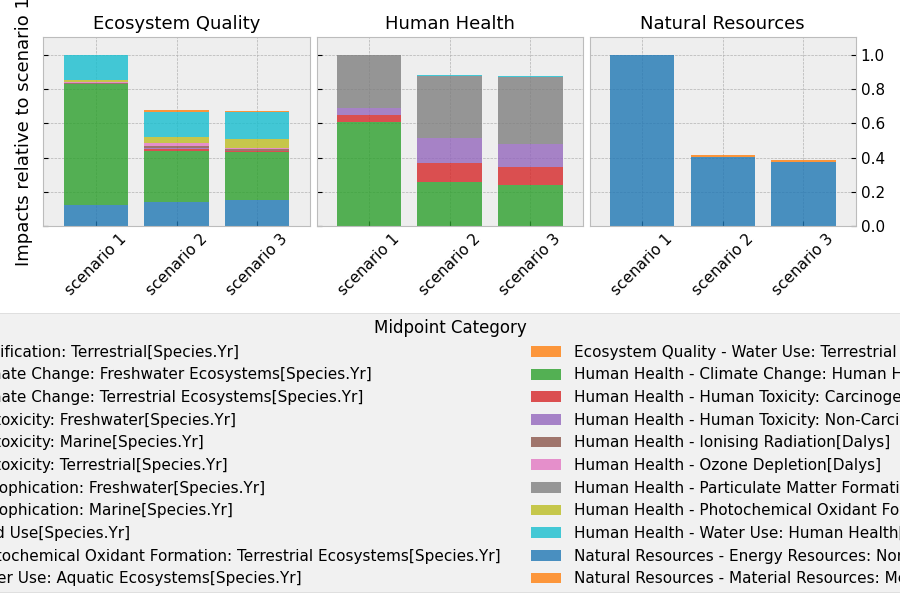

In [24]:
# from matplotlib.ticker import MaxNLocator
import matplotlib.gridspec as gridspec

clusters = combined_df.index.levels[0]
inter_graph = 0
maxi = np.max(np.sum(combined_df, axis=1))
total_width = len(combined_df) + inter_graph * (len(clusters) - 1)

fig = plt.figure(figsize=(total_width, 6))
gridspec.GridSpec(1, total_width)
axes = []
palette = sns.color_palette("tab10")

ax_position = 0
for cluster in clusters:
    subset = combined_df.loc[cluster]
    ax = subset.plot(
        kind="bar",
        stacked=True,
        width=0.8,
        ax=plt.subplot2grid((1, total_width), (0, ax_position), colspan=len(subset.index)),
        color=palette,
        alpha=0.8,
    )
    axes.append(ax)
    ax.set_title(cluster, fontsize=13)
    ax.set_xlabel("")
    ax.set_ylim(0, maxi * 1.1)
    # ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax_position += len(subset.index) + inter_graph
    ax.tick_params(axis="x", rotation=45, labelsize=11)
    ax.set_axisbelow(True)

for i in range(0, len(clusters)):
    axes[i].legend().set_visible(False)
for i in range(0, len(clusters) - 1):
    axes[i].set_yticklabels("")
axes[-1].yaxis.tick_right()
axes[-1].tick_params(axis="y", labelsize=11)
axes[0].set_ylabel("Impacts relative to scenario 1", fontsize=13)

# Collect legend labels from all plots.
entries = collections.OrderedDict()
for ax in axes:
    for handle, label in zip(*axes[0].get_legend_handles_labels()):
        label_name = label.replace("_", " ").title()
        entries[label_name] = handle
legend = fig.legend(
    entries.values(),
    entries.keys(),
    loc="lower center",
    bbox_to_anchor=(0.5, 0),
    ncol=2,
    fontsize=11,
    title="Midpoint Category",
    title_fontsize=12,
)

# Set tight layout while keeping legend in the screen
bbox = legend.get_window_extent(fig.canvas.get_renderer()).transformed(fig.transFigure.inverted())
fig.tight_layout(rect=(0, bbox.y1, 1, 1), h_pad=0.5, w_pad=0.5)

plt.show()

# IAMs comparison

On scenario 2 (ReFuelEU with grid electricity for electrofuels production).

In [25]:
# REMIND - SSP2 Base
process = create_process(
    configuration_file="data/config_scenario_2_remind_ssp2_base.yaml",
)

# Run process
start_time = time.time()
process.compute()
print("--- %s seconds ---" % (time.time() - start_time))

# Calculate total value and save to excel
lca_xarray = process.data["lca_outputs"]
lca_sum = lca_xarray.sum(dim="axis", keepdims=True)
lca_sum = lca_sum.assign_coords(axis=["*sum*"])
lca_expanded = xr.concat([lca_xarray, lca_sum], dim="axis")
lca_expanded.to_dataframe().reset_index().to_excel("lca_outputs_scenario_2_remind_SSP2_base.xlsx")

Loaded LCA model from temporary file (precompiled from previous run in current session).
Running MDA
--- 4.738220453262329 seconds ---


In [ ]:
# IMAGE - SSP2 Base
process = create_process(
    configuration_file="data/config_scenario_2_image_ssp2_base.yaml",
)

# Run process
start_time = time.time()
process.compute()
print("--- %s seconds ---" % (time.time() - start_time))

# Calculate total value and save to excel
lca_xarray = process.data["lca_outputs"]
lca_sum = lca_xarray.sum(dim="axis", keepdims=True)
lca_sum = lca_sum.assign_coords(axis=["*sum*"])
lca_expanded = xr.concat([lca_xarray, lca_sum], dim="axis")
lca_expanded.to_dataframe().reset_index().to_excel("lca_outputs_scenario_2_image_SSP2_base.xlsx")

Initial setup of EcoInvent already done, skipping. To reset the project use option `reset_project=True` in configuration file.
Generating new prospective databases with premise: 
image_SSP2-M_2020,
image_SSP2-M_2030,
image_SSP2-M_2040,
image_SSP2-M_2050
Cache folder cleared!
Cannot find the IAM scenario file at C:\Users\t.planes\AppData\Local\miniconda3\envs\AeroMAPS_LCAFinal\Lib\site-packages\premise\data\iam_output_files\image_SSP2-M. Will check online.
Cannot find the IAM scenario file at C:\Users\t.planes\AppData\Local\miniconda3\envs\AeroMAPS_LCAFinal\Lib\site-packages\premise\data\iam_output_files\image_SSP2-M. Will check online.
Cannot find the IAM scenario file at C:\Users\t.planes\AppData\Local\miniconda3\envs\AeroMAPS_LCAFinal\Lib\site-packages\premise\data\iam_output_files\image_SSP2-M. Will check online.
Cannot find the IAM scenario file at C:\Users\t.planes\AppData\Local\miniconda3\envs\AeroMAPS_LCAFinal\Lib\site-packages\premise\data\iam_output_files\image_SSP2-M. Will ch

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21238/21238 [00:00<00:00, 39032.94it/s]


Adding exchange data to activities


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 674593/674593 [01:01<00:00, 10987.83it/s]


Filling out exchange data


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 21238/21238 [00:03<00:00, 5714.95it/s]


Set missing location of datasets to global scope.
Set missing location of production exchanges to scope of dataset.
Correct missing location of technosphere exchanges.
Correct missing flow categories for biosphere exchanges
Remove empty exchanges.
Remove uncertainty data.
- Extracting inventories
Cannot find cached inventories. Will create them now for next time...
Importing default inventories...

Extracted 1 worksheets in 0.49 seconds
Migrating from 3.5 to 3.8 first
Applying strategy: migrate_datasets
Applying strategy: migrate_exchanges
Migrating from 3.8 to 3.9
Applying strategy: migrate_datasets
Applying strategy: migrate_exchanges
Extracted 1 worksheets in 0.14 seconds
Migrating from 3.5 to 3.8 first
Applying strategy: migrate_datasets
Applying strategy: migrate_exchanges
Migrating from 3.8 to 3.9
Applying strategy: migrate_datasets
Applying strategy: migrate_exchanges
Extracted 1 worksheets in 0.08 seconds
Migrating from 3.5 to 3.8 first
Applying strategy: migrate_datasets
Apply

In [ ]:
# REMIND - SSP1 RCP2.6 (Peak budget 1150 GtCO2 - Paris Agreement)
process = create_process(
    configuration_file="data/config_scenario_2_remind_ssp1_rcp26.yaml",
)

# Run process
start_time = time.time()
process.compute()
print("--- %s seconds ---" % (time.time() - start_time))

# Calculate total value and save to excel
lca_xarray = process.data["lca_outputs"]
lca_sum = lca_xarray.sum(dim="axis", keepdims=True)
lca_sum = lca_sum.assign_coords(axis=["*sum*"])
lca_expanded = xr.concat([lca_xarray, lca_sum], dim="axis")
lca_expanded.to_dataframe().reset_index().to_excel(
    "lca_outputs_scenario_2_remind_SSP1_PkBudg1150.xlsx"
)

In [ ]:
# REMIND - SSP2 RCP2.6 (Peak budget 1150 GtCO2 - Paris Agreement)
process = create_process(
    configuration_file="data/config_scenario_2_remind_ssp2_rcp26.yaml",
)

# Run process
start_time = time.time()
process.compute()
print("--- %s seconds ---" % (time.time() - start_time))

# Calculate total value and save to excel
lca_xarray = process.data["lca_outputs"]
lca_sum = lca_xarray.sum(dim="axis", keepdims=True)
lca_sum = lca_sum.assign_coords(axis=["*sum*"])
lca_expanded = xr.concat([lca_xarray, lca_sum], dim="axis")
lca_expanded.to_dataframe().reset_index().to_excel(
    "lca_outputs_scenario_2_remind_SSP2_PkBudg1150.xlsx"
)

In [ ]:
# IMAGE - SSP2 RCP2.6 (Peak budget 1150 GtCO2 - Paris Agreement)
process = create_process(
    configuration_file="data/config_scenario_2_image_ssp2_rcp26.yaml",
)

# Run process
start_time = time.time()
process.compute()
print("--- %s seconds ---" % (time.time() - start_time))

# Calculate total value and save to excel
lca_xarray = process.data["lca_outputs"]
lca_sum = lca_xarray.sum(dim="axis", keepdims=True)
lca_sum = lca_sum.assign_coords(axis=["*sum*"])
lca_expanded = xr.concat([lca_xarray, lca_sum], dim="axis")
lca_expanded.to_dataframe().reset_index().to_excel("lca_outputs_scenario_2_image_SSP2_RCP26.xlsx")

In [ ]:
# Once done, re-import dataframes corresponding to each IAM model / SSP
lca_outputs_scenario_2_remind_SSP2_base = pd.read_excel(
    "lca_outputs_scenario_2_remind_SSP2_base.xlsx", index_col=0
)
lca_outputs_scenario_2_image_SSP2_base = pd.read_excel(
    "lca_outputs_scenario_2_image_SSP2_base.xlsx", index_col=0
)
lca_outputs_scenario_2_remind_SSP1_PkBudg1150 = pd.read_excel(
    "lca_outputs_scenario_2_remind_SSP1_PkBudg1150.xlsx", index_col=0
)
lca_outputs_scenario_2_remind_SSP2_PkBudg1150 = pd.read_excel(
    "lca_outputs_scenario_2_remind_SSP2_PkBudg1150.xlsx", index_col=0
)
lca_outputs_scenario_2_image_SSP2_RCP26 = pd.read_excel(
    "lca_outputs_scenario_2_image_SSP2_RCP26.xlsx", index_col=0
)

In [ ]:
iams = [
    lca_outputs_scenario_2_remind_SSP2_base,
    # lca_outputs_scenario_2_image_SSP2_base,
    lca_outputs_scenario_2_remind_SSP2_PkBudg1150,
    lca_outputs_scenario_2_remind_SSP1_PkBudg1150,
    # lca_outputs_scenario_2_image_SSP2_RCP26
]
iam_names = [
    "SSP2 - Baseline (No Climate Policy)",
    # "IMAGE - SSP2 Base",
    "SSP2 - RCP2.6",
    "SSP1 - RCP2.6",
    # "IMAGE - SSP2 RCP2.6",
]
dfs = {}

for df, name in zip(iams, iam_names):
    df_filtered = df[df["axis"].str.contains("sum")]
    dfs[name] = df_filtered

combined_df = pd.concat(dfs, names=["IAM Model - Scenario"])  # .reset_index()#(level=0)
combined_df

In [ ]:
plot_evolution_subplots_iams(combined_df)